<a href="https://colab.research.google.com/github/aysavs/monkey-classifier-with-cnn-0-94-acc/blob/main/monkey_classifier_with_cnn_0_94_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
# Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import os

# TensorFlow Libraries
import cv2
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

# Transfer Learning Libraries
from tensorflow.keras.applications import Xception

# Other Libraries
from io import BytesIO
from PIL import Image
import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data from each Monkey Species

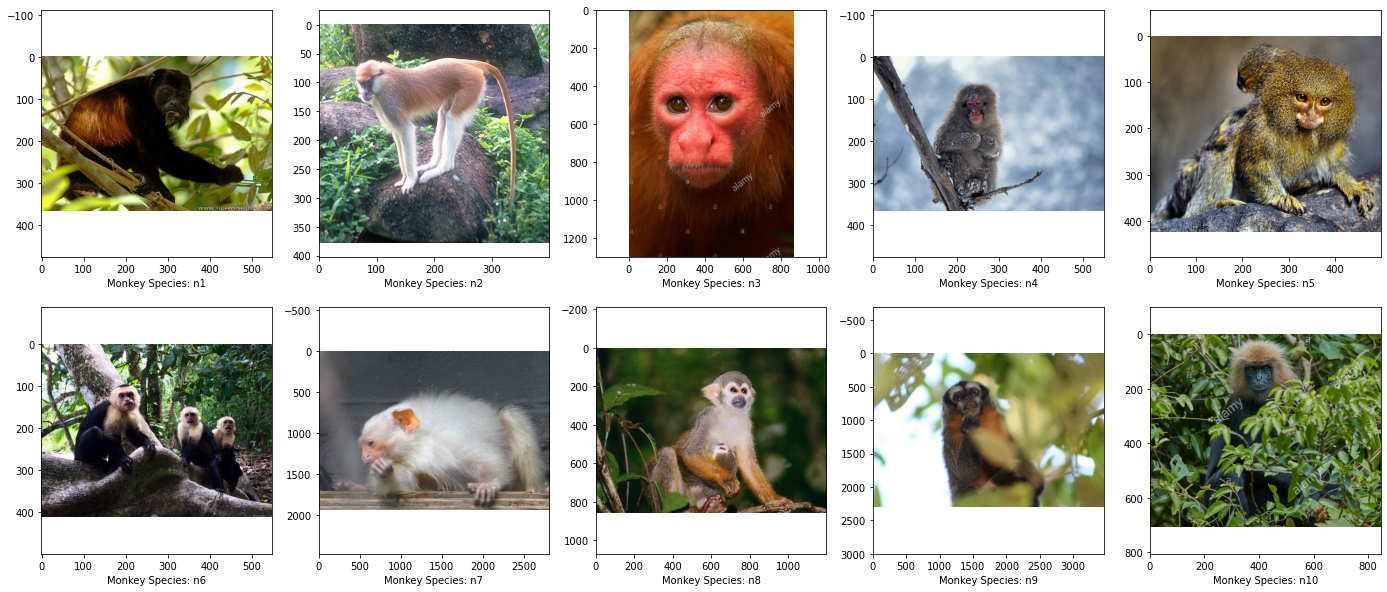

In [ ]:
example_images = ["/content/drive/MyDrive/m/training/training/n0/"
, "/content/drive/MyDrive/m/training/training/n1/"
,"/content/drive/MyDrive/m/training/training/n2/"
, "/content/drive/MyDrive/m/training/training/n3/"
, "/content/drive/MyDrive/m/training/training/n4/"
,"/content/drive/MyDrive/m/training/training/n5/"
,"/content/drive/MyDrive/m/training/training/n6/"
,"/content/drive/MyDrive/m/training/training/n7/"
,"/content/drive/MyDrive/m/training/training/n8/",
"/content/drive/MyDrive/m/training/training/n9/"]

fig = plt.figure(figsize=(24, 10))

j=1
for i in example_images:
    filenames  = os.listdir(i)
    sample = filenames[0]
    img = load_img(i+sample)
    plt.subplot(2,5,j)
    plt.axis("equal")
    plt.imshow(img)
    plt.xlabel("Monkey Species: n{}".format(j))
    j+=1



# Preparing the Data for the Model



In [ ]:
train_dir = '/content/drive/MyDrive/m/training/training'
validation_dir = '/content/drive/MyDrive/m/validation/validation'

BATCH_SIZE = 8
IMG_SIZE = (224,224)


train_datagen = ImageDataGenerator(
    rotation_range = 30,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size= BATCH_SIZE,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')


Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


# Base (Transfer Learning) and Head layers

In [ ]:
Xception_base = Xception(weights='imagenet',
                         include_top=False)

x = Xception_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)

softmax_output_len =int(len(train_generator.class_indices.keys()))

predictions = layers.Dense(softmax_output_len, activation='softmax')(x)
Xception_transfer = models.Model(inputs=Xception_base.input, outputs=predictions)

Xception_transfer.summary()

Xception_transfer.compile(loss='categorical_crossentropy',
                          optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
                          metrics=['accuracy'])

history = Xception_transfer.fit(train_generator,
                                          epochs=10,
                                          shuffle = True,
                                          verbose = 1,
                                          validation_data = validation_generator)

83697664/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                      

# Visualization of the Accuracy and Loss of the model

In [ ]:
def history_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([min(val_loss)-0.2,max(loss)+0.2])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [ ]:
history_plot(history)

# Examining Test Data

In [ ]:
test_images = [
    "https://projectzerofootprint.com/wp-content/uploads/2016/08/monkey-2-1080x768.jpg",
    "https://i.ytimg.com/vi/Ptisy32iRRA/hqdefault.jpg",
    "https://images.pond5.com/red-uakari-monkey-footage-064800523_iconl.jpeg",
    "https://thejapanalps.com/wp-content/uploads/2020/03/nihonsaru01.jpg",
    "https://www.zoo-leipzig.de/fileadmin/_processed_/e/c/csm_Weissbauch-Zwergseidenaeffchen_3_c46c37b6a1.jpg",
    "https://cdn.britannica.com/05/181805-050-C9682415/capuchin-monkey.jpg",
    "https://www.neprimateconservancy.org/uploads/1/5/3/8/15380094/silvery-marmoset-istock-153473655-resize_45.jpg",
    "https://study.com/cimages/multimages/16/squirrel_monkeys.png",
    "https://ars.els-cdn.com/content/image/3-s2.0-B9780124095274000171-f17-04-9780124095274.jpg",
    "https://media-cdn.tripadvisor.com/media/photo-s/0a/67/93/f5/nilgiri-langur-karunkorangu.jpg"
]

test_labels = ["n0", "n1", "n2",
               "n3", "n4", "n5",
               "n6", "n7",
               "n8", "n9"]

monkey_speciets_type = ["Mantled Howler","Patas Monkey","Bald Uakari",
                        "Japanese Macaque","Pygmy Marmoset","White Headed Capuchin",
                        "Silvery Marmoset","Ommon Squirrel Monkey",
                        "Black Headed Night Monkey","Nilgiri Langur"]

In [ ]:

for (i,label) in enumerate(test_labels):
    response = requests.get(test_images[i])
    img = Image.open(BytesIO(response.content))
    img = np.asarray(img)/255.
    img = cv2.resize(img, (224,224))
    prediction=Xception_transfer.predict(img.reshape(1, 224,224,3))
    output = np.argmax(prediction)

    plt.title("Real: {} \n Predict: {}".format(monkey_speciets_type[i], monkey_speciets_type[output]))
    plt.imshow(img)
    plt.show()